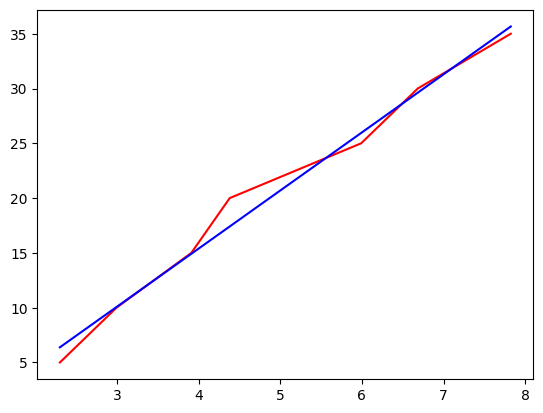

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLDS/Aula 5/estudo.csv', sep=',')

df['log_horas'] = np.log(df['horas_estudo'])

X = df[['log_horas']].to_numpy()
Y = df['idade'].to_numpy()

model = LinearRegression(n_jobs=None, fit_intercept=True)
model.fit(X, Y)
model.score(X, Y)

#plt.plot(X, Y, color='red')
#plt.plot(X, model.predict(X), color='blue')
#plt.show()


In [57]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLDS/Aula 5/Shopping_data.csv', sep=',')

df1 = df.sample(50)
df2 = df.sample(50)
df3 = df.sample(50)
df4 = df.sample(50)

# df = 200 registros
# df1 = 50 registros
# df2 = 50 registros
# df3 = 50 registros
# df4 = 50 registros

In [58]:
X_train = df[['Age']].to_numpy()
Y_train = df['Spending Score'].to_numpy()

X_test1 = df1[['Age']].to_numpy()
Y_test1 = df1['Spending Score'].to_numpy()

X_test2 = df2[['Age']].to_numpy()
Y_test2 = df2['Spending Score'].to_numpy()

X_test3 = df3[['Age']].to_numpy()
Y_test3 = df3['Spending Score'].to_numpy()

X_test4 = df4[['Age']].to_numpy()
Y_test4 = df4['Spending Score'].to_numpy()

model = LinearRegression()
model.fit(X_train, Y_train)

# um R² do meu treino
print(model.score(X_train, Y_train))

# quatro R² de teste
print(model.score(X_test1, Y_test1))
print(model.score(X_test2, Y_test2))
print(model.score(X_test3, Y_test3))
print(model.score(X_test4, Y_test4))

# H0: r² de teste é igual ao r² de treino
# H1: r² de teste é diferente do r² de treino


0.10707740876869032
0.09465170542686507
0.10801745899398174
0.06565219177536574
0.14880072703617875


In [41]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(df[['Age']], df['Spending Score'], test_size=0.1)

model = LinearRegression()
model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))


0.10540258106997924
0.1333354386771911


0.8626465598113774
0.6372688766434311


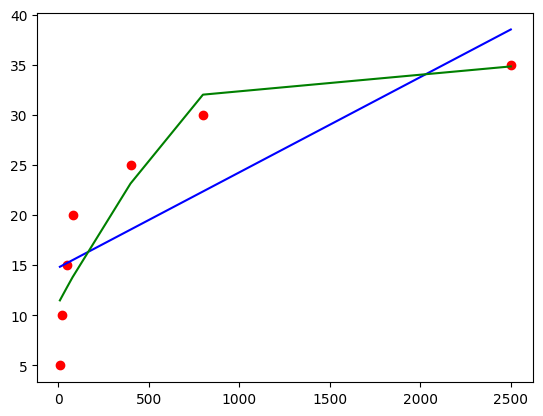

In [79]:
# regressão polinomial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLDS/Aula 5/estudo.csv', sep=',')

# Glugose: glicose
# Insulin: insulina
# regressão para determinar a Insulina a partir da Glicose

df = df.loc[df['horas_estudo'] != 0]
df = df.loc[df['idade'] != 0]

X = df[['horas_estudo']].to_numpy()
Y = df['idade'].to_numpy()

poly_f = PolynomialFeatures(degree=2)
X_poly = poly_f.fit_transform(X)

# Gerar o R-quadrado da Regressão Linear
# Gerar o R-quadrado da Regressão Polinomial

# R2: 0.4 => linear     (NÃO TENHO RISCO DE OVERFITTING)
# R2: 0.6 => polinomial (RISCO DE OVERFITTING)

# gero o R2 da base de treino
# gero o R2 da base de teste
# 0.6 => R2 da base de teste
# meu modelo não generaliza bem
# Vai bem no treino, e vai mal nos testes

# regressão linear, regressão polinomial, 20 variáveis pra testar,
# normalização e ajustes pra fazer floresta, clusters


# Regressão Polinomial
model = LinearRegression()
model.fit(X_poly, Y) # observar o X tratado: será o desenho de uma curva
print(model.score(X_poly, Y))

model1 = LinearRegression()
model1.fit(X, Y) # observar o X tratado: será o desenho de uma curva
print(model1.score(X, Y))

plt.scatter(X, Y, color='red')
plt.plot(X, model1.predict(X), color='blue')
plt.plot(X, model.predict(X_poly), color='green')
plt.show()
